## Chapter 4 - Advanced Operations, Detecting Faces and Features

Have a deeper knowledge of image processing by being able to detect edges, corners, and even faces! Learn how to detect not just front faces but also face profiles, cat, or dogs. Apply the skills to more complex real-world applications. Learn to master several widely used image processing techniques with very few lines of code!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from skimage import io

In [2]:
# Show image
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

In [3]:
# Plot Comparison
def plot_comparison(original, filtered, title_filtered, title_original="original"):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)

  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title(title_original)
  ax1.axis("off")

  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(title_filtered)
  ax2.axis("off")

In [4]:
plt.rcParams["figure.figsize"] = (12,9)

---

### 📒 1. Finding the edges with Canny

Edge detection is extensively used when we want to divide the image into areas corresponding to different objects. Most of the shae information of an image is enclosed in edges.

<br>

**Canny Edge Detection Technique:** Widely considered as the standard edge detection method in image processing. This produces higher accuracy detecting edges and less execution time compared to Sobel Algorithm.

*The canny function requires the image to be grayscale.*

<br>

The first step of this algorithm is to apply a gaussian filter in order to remove noise in the image. In `canny` function we can specify the intensity of gaussian filter using `sigma` attribute. The lower the value of sigma, the less of gaussian filter will be applied to the image hence, it will spot more edges. Default value of this sigma is 1.

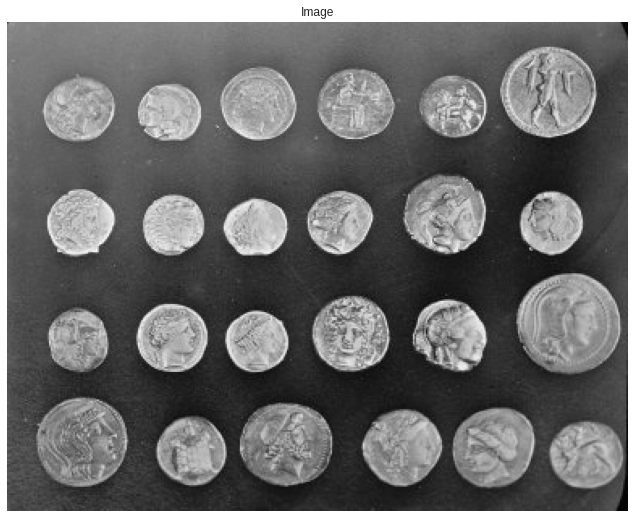

In [5]:
from skimage import data

coins = data.coins()

show_image(coins)

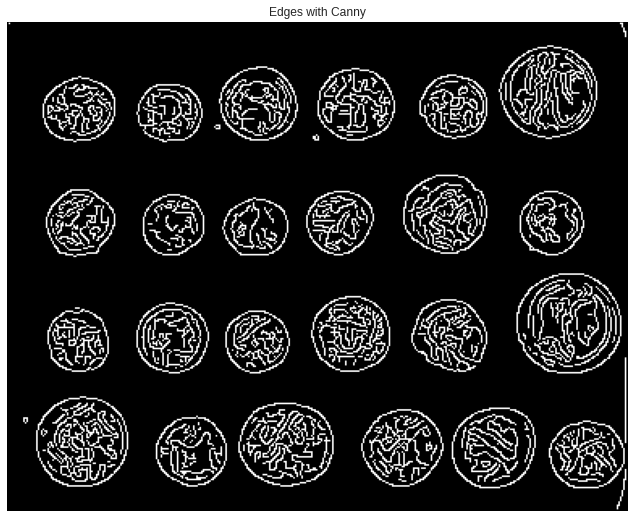

In [7]:
# Edge Detection
from skimage.feature import canny
from skimage.color import rgb2gray

# Convert the image to grayscale
coins = rgb2gray(coins)

# Apply canny detector
canny_edges = canny(coins)

show_image(canny_edges, "Edges with Canny")

### 📝 Edges

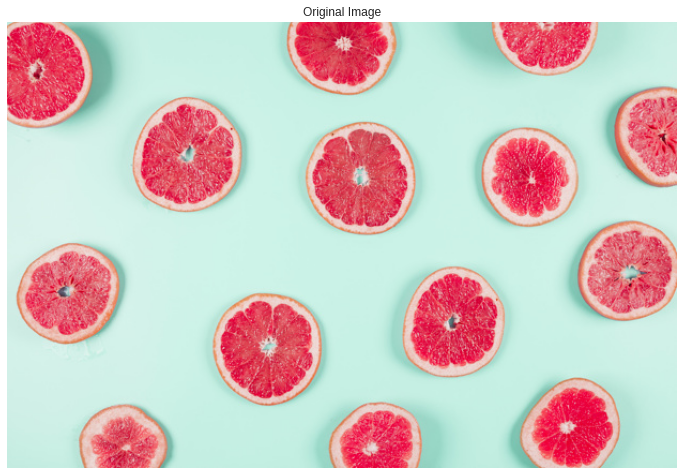

In [8]:
grapefruit = io.imread("https://assets.datacamp.com/production/repositories/4470/datasets/c043d452dc01e6b6ce647e5f31afb20283879f22/toronjas.jpg")
show_image(grapefruit, "Original Image")

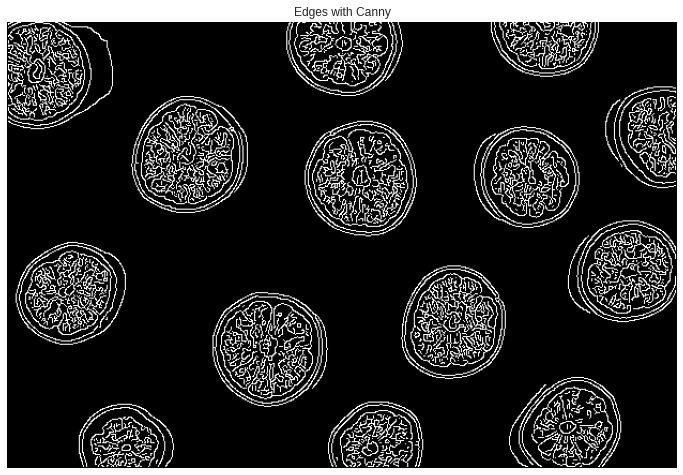

In [9]:
# Convert image to grayscale
grapefruit = rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruit)

# Show resulting image
show_image(canny_edges, "Edges with Canny")

### 📝 Less edgy

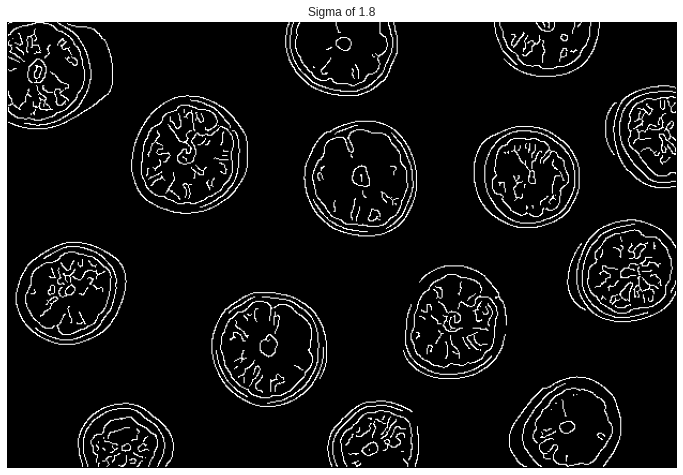

In [10]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit, sigma=1.8)

# Show resulting images
show_image(edges_1_8, "Sigma of 1.8")

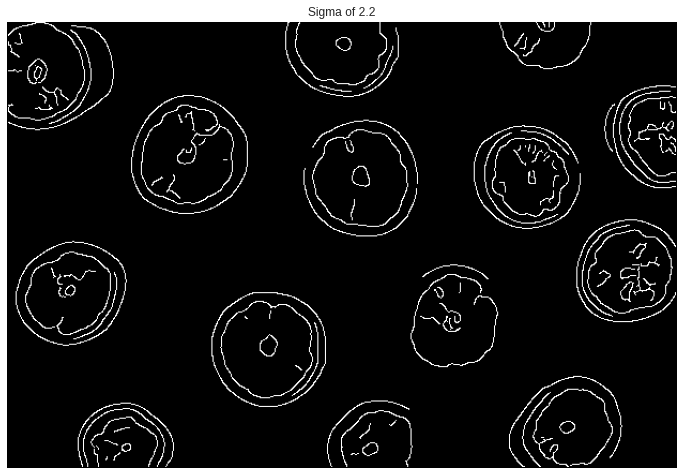

In [11]:
# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit, sigma=2.2)

# Show resulting images
show_image(edges_2_2, "Sigma of 2.2")

As sigma 2.2 is higher than sigma 1.8, sigma 2.2 will apply more intense gaussian filter effect hence will reduce more noise. So, less edges is spotted

---

### 📒 2. Right around the corner

**A corner can be defined as the intersection of two edges.** Intutively it can also a junction of two contours.

Corner detection is an approach used to extract certain types of features and infer the contents of an image.

Frequently used in motion detection, image registration, video tracking, panorama stitching, 3-D modelling and object recognition.

<br>

**Features of an image provide rich content information of that image.**

**Points of interest are points of image which are invariant to rotation, translation, intensity and scale changes.**

<br>

*Corners and Edges are one of the points of interests.*

**Harris Corner Detector** is widely used corner detection operator used in computer vision algorithms.

*This function `corner_harris` requires a grayscale image as input.*

<br>

This function only gives us the possible corners that were measured.

In [12]:
# Show the image along with the corners detected by harris corner detection
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')

### 📝 Perspective

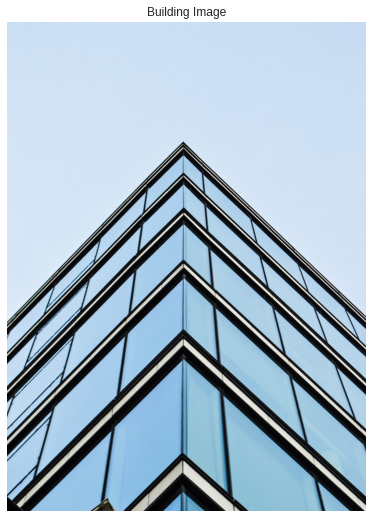

In [13]:
building_image = io.imread("https://assets.datacamp.com/production/repositories/4470/datasets/4e1b6a178fd6d36488339a440959b4639cf54623/corners_building_top.jpg")
show_image(building_image, "Building Image")

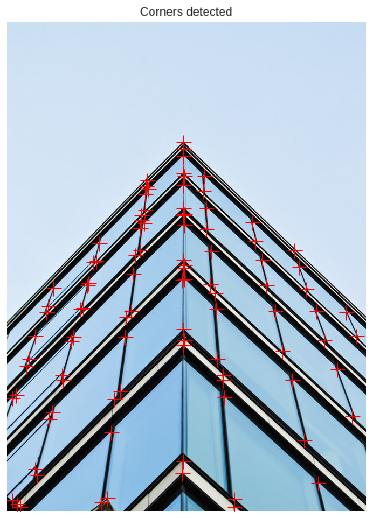

In [15]:
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks

# Convert image from RGB-3 to grayscale
building_image_gray = rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=2)

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords)

### 📝 Less corners

With a min_distance set to 2, we detect a total 98 corners in the image.


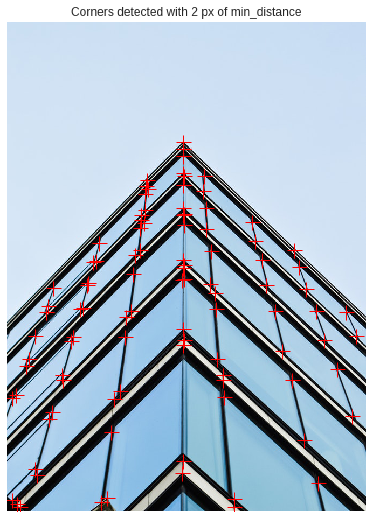

In [20]:
# Find the peaks with a min distance of 2 pixels
coords_w_min_2 = corner_peaks(measure_image, min_distance=2)
print("With a min_distance set to 2, we detect a total", len(coords_w_min_2), "corners in the image.")

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_2, "Corners detected with 2 px of min_distance")

With a min_distance set to 40, we detect a total 36 corners in the image.


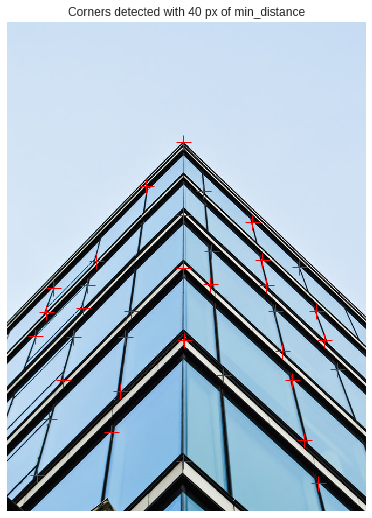

In [21]:
# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, min_distance=40)
print("With a min_distance set to 40, we detect a total", len(coords_w_min_40), "corners in the image.")

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_40, "Corners detected with 40 px of min_distance")

---